In [1]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Data = pd.read_csv("C:\Thyroid_Diff.csv")
Data = Data.rename(columns = {'Hx Radiothreapy':'Hx_Radiothreapy', 'Thyroid Function':'Thyroid_Function', 'Physical Examination':'Physical_Examination'})
Data.drop(columns=['Hx Smoking','T','N','M'], inplace=True)
Data.head()

,Age,Gender,Smoking,Hx_Radiothreapy,Thyroid_Function,Physical_Examination,Adenopathy,Pathology,Focality,Risk,Stage,Response,Recurred
0,27,F,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,I,Indeterminate,No
1,34,F,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,I,Excellent,No
2,30,F,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,I,Excellent,No
3,62,F,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,I,Excellent,No
4,62,F,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,I,Excellent,No


In [3]:
# shape of the dataset
Data.shape

(383, 13)

In [4]:
X = Data.drop(columns=["Recurred"])  #feature
y = Data["Recurred"] #target

# splitting into train and test set
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# preprocessing target
encoder = LabelEncoder()
y = encoder.fit_transform(y)
# y

# preprocessing  features
num_features = X.select_dtypes(include=['int64']).columns
cat_features = X.select_dtypes(include=['object']).columns

num_transformer = StandardScaler()
cat_transformer = OneHotEncoder()
# cat_transformer = LabelEncoder()

preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_features),('cat',cat_transformer, cat_features)])

# creating pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),('regression', LogisticRegression(random_state=42))])

# training
pipeline.fit(Xtrain,ytrain)

# prediction
y_pred = pipeline.predict(Xtest)
# print('prediction:', y_pred)
# print('actual:', ytest)

score = pipeline.score(Xtrain, ytrain)
print('score:', score)

report = classification_report(ytest, y_pred)
print(report)

score: 0.9640522875816994
              precision    recall  f1-score   support

          No       0.98      1.00      0.99        58
         Yes       1.00      0.95      0.97        19

    accuracy                           0.99        77
   macro avg       0.99      0.97      0.98        77
weighted avg       0.99      0.99      0.99        77



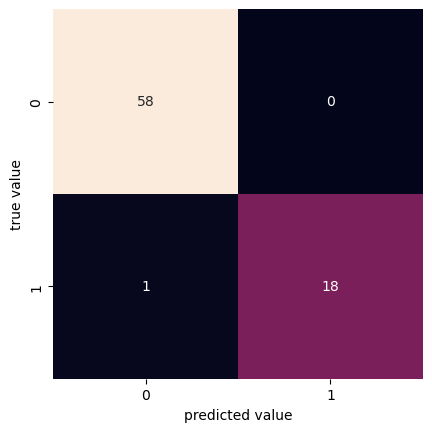

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(ytest, y_pred)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');